In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor

from functions.datacleaning import MoscowHousing as mh
from functions.distance import norm_features

import matplotlib.pylab as plt
plt.style.use('ggplot')

# Gradient Boosting Machine

In [2]:
# Get data
data = mh()

XTrain, YTrain = data.get_data_train()
XTest = data.get_data_test()

In [3]:
XTrain.shape

(23285, 5)

In [4]:
# Only features_final data
XTrain.head()

,area_total,distance,rooms,floor,district
0,-0.011096,-0.315749,3,1,3
1,-0.553098,2.903551,1,5,9
2,0.009357,-0.051469,3,3,2
3,-0.263348,0.304723,2,2,3
4,-0.263348,0.304723,2,2,3


In [5]:
# All data
XTest.head()

,building_id,id,seller,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,...,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating,distance
0,4,26052,NaN,5.675295,NaN,NaN,3,6,NaN,NaN,...,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,0.293752
1,5,29404,1.0,-0.896821,-1.581108,-0.588336,1,1,NaN,-0.077026,...,1982.0,3.0,12,0.0,1.0,0.0,NaN,1.0,NaN,0.116589
2,6,24089,2.0,0.494253,-0.417982,0.678815,3,4,1.0,-0.068230,...,2002.0,3.0,22,0.0,1.0,1.0,1.0,1.0,0.0,-0.040901
3,11,24033,0.0,0.087932,0.163582,0.165921,11,3,NaN,NaN,...,2001.0,3.0,17,0.0,1.0,1.0,NaN,1.0,0.0,0.074818
4,11,32976,1.0,0.096804,-0.316208,0.368062,5,3,1.0,NaN,...,2001.0,3.0,17,0.0,1.0,1.0,NaN,1.0,0.0,0.074818


In [6]:
XTest.shape

(9937, 34)

In [7]:
# Prepare test data for modeling
test_features = data.features_final
XTest = XTest[test_features]

In [8]:
XTest.head()

,area_total,distance,rooms,floor,district
0,5.675295,0.293752,6,3,8
1,-0.896821,0.116589,1,1,1
2,0.494253,-0.040901,4,3,2
3,0.087932,0.074818,3,11,2
4,0.096804,0.074818,3,5,2


In [9]:
YTrain.shape

(23285,)

In [10]:
YTrain.head()

0   -0.232813
1   -0.312594
2   -0.189123
3   -0.255607
4   -0.255607
Name: price, dtype: float64

In [11]:
X = XTrain.copy()
y = YTrain.copy()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
modelGradientBoosting = GradientBoostingRegressor(
    learning_rate=0.08,
    n_estimators=100,
    subsample=1.0, 
    criterion='mse', 
    min_samples_split=4, 
    min_samples_leaf=2, 
    min_weight_fraction_leaf=0.0, 
    max_depth=9, 
    min_impurity_decrease=0.0, 
    init=None, 
    random_state=0, 
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0
)
"""
test_size = 0.2
random_state = 42
features_final = ["area_total", "distance", "rooms", 
                  "floor", "district"]

Tweaking hyper parameters:

1. default from "Ensamble" lr = 0.01 ---> mse 0.22
2. change lr = 0.04 --------------------> mse 0.22
3. change n_estimators = 2500 ----------> mse 0.22
4. change n_estimators = 1000 ----------> mse 0.22
5. change n_estimators =  500 ----------> mse 0.22
6. change n_estimators =  100 ----------> mse 0.22
7. change n_estimators =   50 ----------> mse 0.22
8. change lr = 0.08 --------------------> mse 0.21
9. change lr = 0.09 --------------------> mse 0.21
10. change lr = 0.1 --------------------> mse 0.23
11. lr = 0.08 n_estimators = 1000 ------> mse 0.21
12. lr = 0.08 n_estimators = 5000 ------> mse 0.21 # Long running time
13. lr = 0.08 n_estimators =  500 ------> mse 0.21 
14. lr = 0.08 n_estimators =  100 ------> mse 0.21 # Keep this

15. alpha default 0.9 change to 0.5 ----> mse 0.21
16. alpha = 0.1 ------------------------> mse 0.21
17. alpha = 0.08 -----------------------> mse 0.21
17. alpha = 0.008 ----------------------> mse 0.21 # Keep alpha 0.9

"""

'\ntest_size = 0.2\nrandom_state = 42\nfeatures_final = ["area_total", "distance", "rooms", \n                  "floor", "district"]\n\nTweaking hyper parameters:\n\n1. default from "Ensamble" lr = 0.01 ---> mse 0.22\n2. change lr = 0.04 --------------------> mse 0.22\n3. change n_estimators = 2500 ----------> mse 0.22\n4. change n_estimators = 1000 ----------> mse 0.22\n5. change n_estimators =  500 ----------> mse 0.22\n6. change n_estimators =  100 ----------> mse 0.22\n7. change n_estimators =   50 ----------> mse 0.22\n8. change lr = 0.08 --------------------> mse 0.21\n9. change lr = 0.09 --------------------> mse 0.21\n10. change lr = 0.1 --------------------> mse 0.23\n11. lr = 0.08 n_estimators = 1000 ------> mse 0.21\n12. lr = 0.08 n_estimators = 5000 ------> mse 0.21 # Long running time\n13. lr = 0.08 n_estimators =  500 ------> mse 0.21 \n14. lr = 0.08 n_estimators =  100 ------> mse 0.21 # Keep this\n\n15. alpha default 0.9 change to 0.5 ----> mse 0.21\n16. alpha = 0.1 ---

In [14]:
modelGradientBoosting.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.08, max_depth=9,
                          min_samples_leaf=2, min_samples_split=4,
                          random_state=0)

In [15]:
gb_prediction = modelGradientBoosting.predict(X_test)

In [16]:
gb_mse = round(mean_squared_error(gb_prediction, y_test), 2)
print('Test MSE:', gb_mse)

Test MSE: 0.21


Text(0, 0.5, 'Ground Truth')

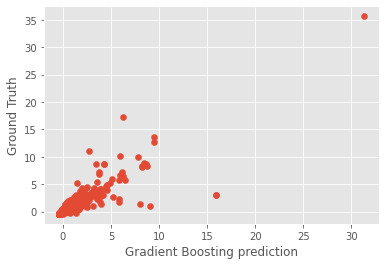

In [17]:
plt.scatter(gb_prediction, y_test)
plt.xlabel('Gradient Boosting prediction')
plt.ylabel('Ground Truth')

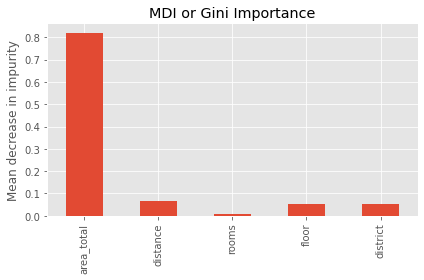

In [18]:
importances = modelGradientBoosting.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("MDI or Gini Importance")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [19]:
print(gb_prediction)

[-0.19326224 -0.23585099 -0.19700884 ... -0.26345875 -0.10153249
 -0.03668979]


In [20]:
gb_prediction_REAL = modelGradientBoosting.predict(XTest)
data.write_results("gb_prediction.csv", gb_prediction_REAL)

# LGBM regression

In [21]:
X = XTrain.copy()
y = YTrain.copy()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
modelLGBM = lgb.LGBMRegressor(
    num_leaves=9,
    max_depth=9, 
    random_state=42, 
    silent=True, 
    metric='mse',
    n_jobs=4, 
    n_estimators=2000,
    colsample_bytree=0.95,
    subsample=0.9,
    learning_rate=0.05
)

"""
test_size = 0.2
random_state = 42
features_final = ["area_total", "distance", "rooms", 
                  "floor", "district"]

1. num_leaves (8 or 9) ------------------> mse 0.391182 # Keep 9
2. change num_leaves = 100 (default 10)--> mse 0.41
3. change num_leaves =  50 --------------> mse 0.41
4. change num_leaves =   5 --------------> mse 0.392748
5. change max_depth = 10 (default 5)-----> mse 0.388720
6. change max_depth =  9 ----------------> mse 0.37919  # Keep 9
7. change lr = 0.09 (default 0.05) ------> mse 0.401366 # Keep 0.05
8. change lr = 0.02 ---------------------> mse 0.398036
9. change n_estimators (default 2000) ---> mse 0.401958 # Worse 1000
10. change n_estimators 3000 ------------> mse 0.384764 # Worse 3000
11. change n_estimators 2500 -------------------------> # Keep 2000

"""

'\ntest_size = 0.2\nrandom_state = 42\nfeatures_final = ["area_total", "distance", "rooms", \n                  "floor", "district"]\n\n1. num_leaves (8 or 9) ------------------> mse 0.391182 # Keep 9\n2. change num_leaves = 100 (default 10)--> mse 0.41\n3. change num_leaves =  50 --------------> mse 0.41\n4. change num_leaves =   5 --------------> mse 0.392748\n5. change max_depth = 10 (default 5)-----> mse 0.388720\n6. change max_depth =  9 ----------------> mse 0.37919  # Keep 9\n7. change lr = 0.09 (default 0.05) ------> mse 0.401366 # Keep 0.05\n8. change lr = 0.02 ---------------------> mse 0.398036\n9. change n_estimators (default 2000) ---> mse 0.401958 # Worse 1000\n10. change n_estimators 3000 ------------> mse 0.384764 # Worse 3000\n11. change n_estimators 2500 -------------------------> # Keep 2000\n\n'

In [24]:
modelLGBM.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.95, learning_rate=0.05, max_depth=9,
              metric='mse', n_estimators=2000, n_jobs=4, num_leaves=9,
              random_state=42, subsample=0.9)

In [25]:
lgbm_prediction = modelLGBM.predict(X_test)

In [26]:
lgb_mse = round(mean_squared_error(lgbm_prediction, y_test), 6)
print('Test MSE:', lgb_mse)

Test MSE: 0.37919


Text(0, 0.5, 'Ground Truth')

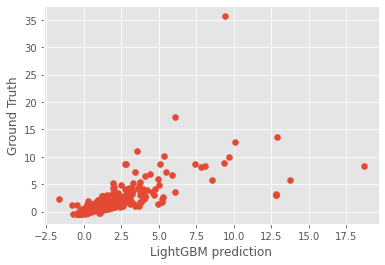

In [27]:
plt.scatter(lgbm_prediction, y_test)
plt.xlabel('LightGBM prediction')
plt.ylabel('Ground Truth')

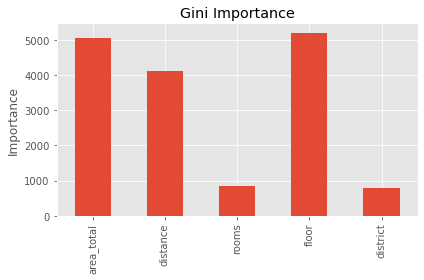

In [28]:
importances = modelLGBM.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Gini Importance")
ax.set_ylabel("Importance")
fig.tight_layout()

In [29]:
print(lgbm_prediction)

[-0.15087694 -0.25395514 -0.21401283 ... -0.26335452 -0.10094462
 -0.00741395]


In [30]:
print(len(lgbm_prediction))

4657


In [31]:
lgbm_prediction_REAL = modelLGBM.predict(XTest)

In [32]:
data.write_results("lgbm_prediction.csv", lgbm_prediction_REAL)

In [34]:
from functools import reduce
mod1 = pd.read_csv("gb_prediction.csv")
mod2 = pd.read_csv("lgbm_prediction.csv")
mod3 = pd.read_csv("price_pred_1.csv")

r = reduce(lambda a, b: a.add(b, fill_value=0), [mod1["price_prediction"], mod2["price_prediction"], mod3["price_prediction"]])
r_mean = (r * 1.0/3).to_numpy()

data.write_results("three_model_prediction.csv", r_mean, revert=False)


In [35]:
XTest.head()

,area_total,distance,rooms,floor,district
0,5.675295,0.293752,6,3,8
1,-0.896821,0.116589,1,1,1
2,0.494253,-0.040901,4,3,2
3,0.087932,0.074818,3,11,2
4,0.096804,0.074818,3,5,2


In [36]:
mod1.head()

,id,price_prediction
0,26052,1.857861e+08
1,29404,4.492224e+06
2,24089,1.658347e+07
3,24033,1.370570e+07
4,32976,1.373504e+07


In [37]:
mod1.shape

(9937, 2)

In [38]:
mod2.head()

,id,price_prediction
0,26052,1.477332e+08
1,29404,4.153668e+06
2,24089,1.808668e+07
3,24033,1.347672e+07
4,32976,1.409905e+07


In [39]:
mod2.shape

(9937, 2)

In [40]:
mod3.head()

,id,price_prediction
0,26052,1.811071e+08
1,29404,4.304328e+06
2,24089,1.758720e+07
3,24033,1.520463e+07
4,32976,1.535471e+07


In [41]:
# Scoring for this model on Leaderboard is 0.31293 (only RF 0.34110)
# Using mean of score for RF + GB + LGBM as prediction

# No restrictions on outer ranges 

# Only run for features that have no NaN 
# ["area_total", "distance", "rooms", "floor", "district"]

# LGBM has better impact on distance and floor than the other models
# All models have high impact from area_total

final = pd.read_csv("three_model_prediction.csv")
final.head()

,id,price_prediction
0,26052,1.715421e+08
1,29404,4.316740e+06
2,24089,1.741911e+07
3,24033,1.412901e+07
4,32976,1.439627e+07
